In [1]:
import numpy as np
INPUT_FOLDER = "../dec6_2000_episodes_gpu_both/"
SIGMA_TEMP = 0.01
RNN_TRAINING_DATA_FILE = "../dec6_models/rnn_training_data.npz"
training_data = np.load(RNN_TRAINING_DATA_FILE)
action_data = training_data['action']
observation_data = training_data['latent']

In [2]:
import keras
import tensorflow as tf

tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True

#Importing the VAE and RNN.
import os
import sys
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

Using TensorFlow backend.


/home/kaiolae/code/word_models_keras_test/WorldModels


In [3]:

import analyze_rnn_predictions
%load_ext autoreload
%autoreload 2 #If we want to automatically load external modules as they are updated.

/home/kaiolae/code/word_models_keras_test/WorldModels


In [4]:
#To access gym
import sys
sys.path.append('/home/kaiolae/.virtualenvs/worldmodels/lib/python3.5/site-packages')
import os

In [5]:
import fnmatch
def get_all_models():
    all_models = {} #Dict of all models, with num mixtures as key
    for folder in os.listdir(INPUT_FOLDER):
        
        if fnmatch.fnmatch(folder, 'trained_sequential_rnn_*') :
            mixtures_start_index = folder.find('rnn_')+4
            mixtures_end_index = folder.find('mixtures')
            num_mixtures = int(folder[mixtures_start_index:mixtures_end_index])
            if num_mixtures in all_models.keys():
                all_models[num_mixtures].append(INPUT_FOLDER+folder)
            else:
                all_models[num_mixtures] = [INPUT_FOLDER+folder]
            
    return all_models
            
print(get_all_models())

{5: ['../dec6_2000_episodes_gpu_both/trained_sequential_rnn_5mixtures_run2', '../dec6_2000_episodes_gpu_both/trained_sequential_rnn_5mixtures_run8', '../dec6_2000_episodes_gpu_both/trained_sequential_rnn_5mixtures_run9', '../dec6_2000_episodes_gpu_both/trained_sequential_rnn_5mixtures_run3', '../dec6_2000_episodes_gpu_both/trained_sequential_rnn_5mixtures_run7', '../dec6_2000_episodes_gpu_both/trained_sequential_rnn_5mixtures_run6', '../dec6_2000_episodes_gpu_both/trained_sequential_rnn_5mixtures_run5', '../dec6_2000_episodes_gpu_both/trained_sequential_rnn_5mixtures_run10', '../dec6_2000_episodes_gpu_both/trained_sequential_rnn_5mixtures_run4', '../dec6_2000_episodes_gpu_both/trained_sequential_rnn_5mixtures_run1'], 3: ['../dec6_2000_episodes_gpu_both/trained_sequential_rnn_3mixtures_run6', '../dec6_2000_episodes_gpu_both/trained_sequential_rnn_3mixtures_run8', '../dec6_2000_episodes_gpu_both/trained_sequential_rnn_3mixtures_run2', '../dec6_2000_episodes_gpu_both/trained_sequential_rn

In [6]:
from collections import namedtuple

rnn_analyzers = {}
filename = "rnn_trained_model.h5"
for key, val in get_all_models().items():
    rnn_analyzers[key] = []
    for model in val:
        if filename not in os.listdir(model):
            print("Unfinished run. Skipping.")
            continue
        print("Loading model: ", model)
        new_analyzer = analyze_rnn_predictions.RNNAnalyzer(model+"/"+filename, key, 1.0) #TODO Note, I previously used temp=0.1 - Which Ha noted was so low that we got mode collapse.
        rnn_analyzers[key].append(new_analyzer)
print("rnn analyzers: ", rnn_analyzers)

Loading model:  ../dec6_2000_episodes_gpu_both/trained_sequential_rnn_5mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   416         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 645)                  165765    
Total params: 495,493
Trainable params: 495,493
Non-trainable params: 0
_________________________________________________________________
Unfinished run. Skipping.
Loading model:  ../dec6_2000_episodes_gpu_both/trained_sequential_rnn_5mixtures_run7
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
______________________________________

Loading model:  ../dec6_2000_episodes_gpu_both/trained_sequential_rnn_5mixtures_run5
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 32, 32, 32)   416         conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 645)                  165765    
Total params: 495,493
Trainable params: 495,493
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../dec6_2000_episodes_gpu_both/trained_sequential_rnn_5mixtures_run1
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
________________________________________________________________

Loading model:  ../dec6_2000_episodes_gpu_both/trained_sequential_rnn_3mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 32, 32, 32)   416         conv2d_41[0][0]                  
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 387)                  99459     
Total params: 429,187
Trainable params: 429,187
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../dec6_2000_episodes_gpu_both/trained_sequential_rnn_3mixtures_run10
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
_______________________________________________________________

Loading model:  ../dec6_2000_episodes_gpu_both/trained_sequential_rnn_3mixtures_run7
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_62 (Conv2D)              (None, 32, 32, 32)   416         conv2d_61[0][0]                  
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../dec6_2000_episodes_gpu_both/trained_sequential_rnn_1mixtures_run5
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
________________________________________________________________

Unfinished run. Skipping.
Unfinished run. Skipping.
Loading model:  ../dec6_2000_episodes_gpu_both/trained_sequential_rnn_1mixtures_run1
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_81 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_82 (Conv2D)              (None, 32, 32, 32)   416         conv2d_81[0][0]                  
____________________________________________________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________
Unfinished run. Skipping.
Loading model:  ../dec6_2000_episodes_gpu_both/trained_sequential_rnn_1mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
______________________________________

In [7]:
import count_monsters_and_balls
FIREBALL_THRESHOLD = 0.5
WALL_THRESHOLD = 0.39
def count_events_in_dream(dreamed_latent_sequence, rnn_analyzer, num_mixtures):
    decoded_images = rnn_analyzer.decode_with_vae(dreamed_latent_sequence)
    num_explosions = 0
    num_fireballs = 0
    num_left_walls = 0
    num_right_walls = 0
    for img_counter in range(len(decoded_images)):
        img = decoded_images[img_counter]
        is_exploding = count_monsters_and_balls.is_there_a_big_explosion(img)
        is_fireball, _ = count_monsters_and_balls.count_fireballs(img)
        is_left_wall = count_monsters_and_balls.is_there_a_lefthand_wall(img, WALL_THRESHOLD)
        is_right_wall = count_monsters_and_balls.is_there_a_righthand_wall(img, WALL_THRESHOLD)

        if is_exploding:
            num_explosions+=1
        elif is_fireball:
            num_fireballs+=1
        elif is_left_wall:
            num_left_walls+=1
        elif is_right_wall:
            num_right_walls+=1
            
    events_data = [{"type":"explosion", "count":num_explosions, "num_mixtures":num_mixtures},
                  {"type":"fireball", "count":num_fireballs, "num_mixtures":num_mixtures},
                  {"type":"left_wall", "count":num_left_walls, "num_mixtures":num_mixtures},
                  {"type":"right_wall", "count":num_right_walls, "num_mixtures":num_mixtures}]
    

    return events_data

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from

In [13]:
num_independent_tests = 10
warm_up_length = 100
num_dream_timesteps=1000
events_dicts=[]
for j in range(num_independent_tests):
    print("Step ", j)
    #Getting a random conditioning sequence to start the RNN.
    
    latent_sequence, action_sequence = analyze_rnn_predictions.get_random_starting_sequence(observation_data, action_data,2)
    
    for num_mixtures in rnn_analyzers.keys():
        
        #For each trained model
        for rnn_analyzer in rnn_analyzers[num_mixtures]:
            rnn_analyzer._reset()
            rnn_analyzer.warm_up_lstm_with_single_input(latent_sequence[0], warm_up_length)
            dreamed_latents = []
            dreamed_latent, mixture_weights = rnn_analyzer.predict_one_step(rnn_analyzer.generate_random_action(), previous_z=latent_sequence[0], sigma_temp=SIGMA_TEMP)
            dreamed_latents.append(dreamed_latent)
            for dream_step in range(num_dream_timesteps-1):
                dreamed_latent, mixture_weights = rnn_analyzer.predict_one_step(rnn_analyzer.generate_random_action(), sigma_temp=SIGMA_TEMP)
                dreamed_latents.append(dreamed_latent)
            events_dict = count_events_in_dream(dreamed_latents,rnn_analyzer,num_mixtures)
            events_dicts.extend(events_dict)
            print(events_dict)
            print(events_dicts)


Step  0
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 180, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 1, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 266, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 460, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 348, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 9, 'num_mixtures': 3}, {'type': 'fireball', 'count': 217, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 134, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 73, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 250, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 136, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 23, 'num_mixtures': 1}, {'type': 'fireball', 'count': 200, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 74, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 327, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 54, 'num_mixtures': 1}, {'type': 'fireball', 'count': 341, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 123, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 109, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 90, 'num_mixtures': 5}, {'type': 'fireball', 'count': 537, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 48, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 88, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type'

[{'type': 'explosion', 'count': 77, 'num_mixtures': 5}, {'type': 'fireball', 'count': 123, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 223, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 57, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 241, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 33, 'num_mixtures': 5}, {'type': 'fireball', 'count': 318, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 83, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 2, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 135, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 192, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 157, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 4, 'num_mixtures': 3}, {'type': 'fireball', 'count': 270, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 78, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 253, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 160, 'num_mixtures': 3}, {'type': 'fireball', 'count': 201, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 41, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 19, 'num_mixtures': 3}, {'type': 'fireball', 'count': 367, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 128, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 60, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 26, 'num_mixtures': 3}, {'type': 'fireball', 'count': 268, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 275, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 96, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 168, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 220, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 138, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 134, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 38, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 129, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 157, 'num_mixtures': 1}, {'type': 'fireball', 'count': 539, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 114, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 352, 'num_mixtures': 1}, {'type': 'fireball', 'count': 138, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 231, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 10, 'num_mixtures': 1}, {'type': 'fireball', 'count': 142, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 167, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 209, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 219, 'num_mixtures': 1}, {'type': 'fireball', 'count': 216, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 120, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 68, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 31, 'num_mixtures': 1}, {'type': 'fireball', 'count': 164, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 94, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 74, 'num_mixtures': 1}, {'type': 'fireball', 'count': 398, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 223, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 13, 'num_mixtures': 5}, {'type': 'fireball', 'count': 314, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 100, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 55, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 28, 'num_mixtures': 5}, {'type': 'fireball', 'count': 155, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 334, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 85, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 77, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 54, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 51, 'num_mixtures': 5}, {'type': 'fireball', 'count': 339, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 91, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 76, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 68, 'num_mixtures': 5}, {'type': 'fireball', 'count': 348, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 97, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 138, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 2, 'num_mixtures': 5}, {'type': 'fireball', 'count': 126, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 28, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 262, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 14, 'num_mixtures': 5}, {'type': 'fireball', 'count': 351, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 245, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 86, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 81, 'num_mixtures': 5}, {'type': 'fireball', 'count': 350, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 254, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 47, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 145, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 173, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 100, 'num_mixtures': 3}, {'type': 'fireball', 'count': 123, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 22, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 59, 'num_mixtures': 3}, {'type': 'fireball', 'count': 207, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 86, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 97, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 119, 'num_mixtures': 3}, {'type': 'fireball', 'count': 414, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 147, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 177, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {

[{'type': 'explosion', 'count': 41, 'num_mixtures': 3}, {'type': 'fireball', 'count': 542, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 105, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 106, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 53, 'num_mixtures': 3}, {'type': 'fireball', 'count': 207, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 271, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 304, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 212, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 10, 'num_mixtures': 3}, {'type': 'fireball', 'count': 88, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 309, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 289, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 132, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 283, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 265, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 91, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 223, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 15, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 102, 'num_mixtures': 1}, {'type': 'fireball', 'count': 562, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 62, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 17, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 26, 'num_mixtures': 1}, {'type': 'fireball', 'count': 393, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 108, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 92, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 114, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 98, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 240, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 30, 'num_mixtures': 1}, {'type': 'fireball', 'count': 298, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 193, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 49, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 18, 'num_mixtures': 1}, {'type': 'fireball', 'count': 216, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 13, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 229, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 6, 'num_mixtures': 5}, {'type': 'fireball', 'count': 263, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 137, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 79, 'num_mixtures': 5}, {'type': 'fireball', 'count': 272, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 66, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 165, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 50, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 173, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 32, 'num_mixtures': 5}, {'type': 'fireball', 'count': 369, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 66, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 31, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 36, 'num_mixtures': 5}, {'type': 'fireball', 'count': 367, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 76, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 241, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 175, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 227, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 6, 'num_mixtures': 5}, {'type': 'fireball', 'count': 192, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 178, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 16, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 267, 'num_mixtures': 5}, {'type': 'fireball', 'count': 346, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 28, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 8, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 1, 'num_mixtures': 5}, {'type': 'fireball', 'count': 267, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 34, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 116, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 143, 'num_mixtures': 3}, {'type': 'fireball', 'count': 250, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 202, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 35, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 49, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 74, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 42, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 114, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 154, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 17, 'num_mixtures': 3}, {'type': 'fireball', 'count': 201, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 337, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 108, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 175, 'num_mixtures': 3}, {'type': 'fireball', 'count': 146, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 17, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 79, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 34, 'num_mixtures': 3}, {'type': 'fireball', 'count': 423, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 55, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 300, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 45, 'num_mixtures': 3}, {'type': 'fireball', 'count': 307, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 96, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 94, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 155, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 146, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 96, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 4, 'num_mixtures': 1}, {'type': 'fireball', 'count': 91, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 130, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 106, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 98, 'num_mixtures': 1}, {'type': 'fireball', 'count': 257, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 108, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 56, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 246, 'num_mixtures': 1}, {'type': 'fireball', 'count': 306, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 151, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 93, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 1, 'num_mixtures': 1}, {'type': 'fireball', 'count': 201, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 67, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 311, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 180, 'num_mixtures': 1}, {'type': 'fireball', 'count': 239, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 260, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 47, 'num_mixtures': 1}, {'type': 'fireball', 'count': 128, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 271, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 75, 'num_mixtures': 1}, {'type': 'fireball', 'count': 439, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 147, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 248, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 417, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 63, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 161, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 323, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 5, 'num_mixtures': 5}, {'type': 'fireball', 'count': 158, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 336, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 243, 'num_mixtures': 5}, {'type': 'fireball', 'count': 389, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 62, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 32, 'num_mixtures': 5}, {'type': 'fireball', 'count': 313, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 76, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 42, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 91, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 24, 'num_mixtures': 5}, {'type': 'fireball', 'count': 368, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 173, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 76, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 463, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 145, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 164, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 112, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 54, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 3, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 604, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 141, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 76, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 186, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 83, 'num_mixtures': 3}, {'type': 'fireball', 'count': 429, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 60, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 46, 'num_mixtures': 3}, {'type': 'fireball', 'count': 393, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 181, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 7, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 68, 'num_mixtures': 3}, {'type': 'fireball', 'count': 497, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 288, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 16, 'num_mixtures': 3}, {'type': 'fireball', 'count': 281, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 49, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 116, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 71, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 64, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type'

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 78, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 470, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 57, 'num_mixtures': 1}, {'type': 'fireball', 'count': 392, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 174, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 33, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 31, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 79, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 242, 'num_mixtures': 1}, {'type': 'fireball', 'count': 461, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 68, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 95, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 68, 'num_mixtures': 1}, {'type': 'fireball', 'count': 382, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 93, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 182, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 7, 'num_mixtures': 1}, {'type': 'fireball', 'count': 57, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 259, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 23, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 25, 'num_mixtures': 1}, {'type': 'fireball', 'count': 158, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 349, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 25, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 5, 'num_mixtures': 1}, {'type': 'fireball', 'count': 305, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 176, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 82, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 40, 'num_mixtures': 5}, {'type': 'fireball', 'count': 307, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 167, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 80, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 186, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 43, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 220, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 4, 'num_mixtures': 5}, {'type': 'fireball', 'count': 180, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 193, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 239, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 234, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 5, 'num_mixtures': 5}, {'type': 'fireball', 'count': 350, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 10, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 21, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 21, 'num_mixtures': 5}, {'type': 'fireball', 'count': 146, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 53, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 5, 'num_mixtures': 5}, {'type': 'fireball', 'count': 247, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 316, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 120, 'num_mixtures': 5}, {'type': 'fireball', 'count': 221, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 92, 'num_mixtures': 5}, {'type': 'fireball', 'count': 320, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 178, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 63, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 179, 'num_mixtures': 3}, {'type': 'fireball', 'count': 310, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 177, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 97, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 130, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 113, 'num_mixtures': 3}, {'type': 'fireball', 'count': 283, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 6, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 32, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 245, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 97, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 172, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 74, 'num_mixtures': 3}, {'type': 'fireball', 'count': 267, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 106, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 7, 'num_mixtures': 3}, {'type': 'fireball', 'count': 159, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 114, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 321, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 9, 'num_mixtures': 3}, {'type': 'fireball', 'count': 159, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 44, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 323, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 16, 'num_mixtures': 3}, {'type': 'fireball', 'count': 112, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 328, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 167, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 33, 'num_mixtures': 1}, {'type': 'fireball', 'count': 507, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 123, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 48, 'num_mixtures': 1}, {'type': 'fireball', 'count': 218, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 130, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 4, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 29, 'num_mixtures': 1}, {'type': 'fireball', 'count': 398, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 213, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 15, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 40, 'num_mixtures': 1}, {'type': 'fireball', 'count': 397, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 162, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 67, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 56, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 203, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 135, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 18, 'num_mixtures': 1}, {'type': 'fireball', 'count': 236, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 188, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 119, 'num_mixtures': 1}, {'type': 'fireball', 'count': 276, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 170, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 24, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 62, 'num_mixtures': 5}, {'type': 'fireball', 'count': 329, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 192, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 50, 'num_mixtures': 5}, {'type': 'fireball', 'count': 207, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 161, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 78, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 12, 'num_mixtures': 5}, {'type': 'fireball', 'count': 267, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 43, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 353, 'num_mixtures': 5}, {'type': 'fireball', 'count': 332, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 5, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 53, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 24, 'num_mixtures': 5}, {'type': 'fireball', 'count': 342, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 101, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 81, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 16, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 73, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 33, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 10, 'num_mixtures': 5}, {'type': 'fireball', 'count': 330, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 265, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 29, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 86, 'num_mixtures': 5}, {'type': 'fireball', 'count': 416, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 20, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 143, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 1, 'num_mixtures': 5}, {'type': 'fireball', 'count': 263, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 506, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 240, 'num_mixtures': 3}, {'type': 'fireball', 'count': 336, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 88, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 4, 'num_mixtures': 3}, {'type': 'fireball', 'count': 143, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 388, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 42, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 146, 'num_mixtures': 3}, {'type': 'fireball', 'count': 356, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 182, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 229, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 183, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 246, 'num_mixtures': 3}, {'type': 'fireball', 'count': 277, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 15, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 20, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 197, 'num_mixtures': 3}, {'type': 'fireball', 'count': 284, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 188, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 75, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 28, 'num_mixtures': 3}, {'type': 'fireball', 'count': 359, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 246, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 3, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 96, 'num_mixtures': 3}, {'type': 'fireball', 'count': 279, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 166, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 69, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 1, 'num_mixtures': 1}, {'type': 'fireball', 'count': 339, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 190, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 46, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 136, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 104, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 80, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 11, 'num_mixtures': 1}, {'type': 'fireball', 'count': 496, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 53, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 23, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 19, 'num_mixtures': 1}, {'type': 'fireball', 'count': 166, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 134, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 28, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 163, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 219, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 194, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 83, 'num_mixtures': 1}, {'type': 'fireball', 'count': 467, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 125, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 62, 'num_mixtures': 1}, {'type': 'fireball', 'count': 231, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 103, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 38, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 48, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 49, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 75, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 450, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 303, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 35, 'num_mixtures': 5}, {'type': 'fireball', 'count': 338, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 5, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 32, 'num_mixtures': 5}, {'type': 'fireball', 'count': 386, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 256, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 28, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 2, 'num_mixtures': 5}, {'type': 'fireball', 'count': 285, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 296, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 50, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 1, 'num_mixtures': 5}, {'type': 'fireball', 'count': 189, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 154, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 156, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 229, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 53, 'num_mixtures': 5}, {'type': 'fireball', 'count': 348, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 177, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 63, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 399, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 93, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 71, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 114, 'num_mixtures': 3}, {'type': 'fireball', 'count': 312, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 251, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 78, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 77, 'num_mixtures': 3}, {'type': 'fireball', 'count': 215, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 105, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 78, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 134, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 40, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 35, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 368, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 93, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 127, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 85, 'num_mixtures': 3}, {'type': 'fireball', 'count': 406, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 15, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 87, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 105, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 56, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 239, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 4, 'num_mixtures': 3}, {'type': 'fireball', 'count': 265, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 197, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 21, 'num_mixtures': 3}, {'type': 'fireball', 'count': 273, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 265, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 24, 'num_mixtures': 1}, {'type': 'fireball', 'count': 514, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 165, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 62, 'num_mixtures': 1}, {'type': 'fireball', 'count': 282, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 164, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 32, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 153, 'num_mixtures': 1}, {'type': 'fireball', 'count': 241, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 107, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 29, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 268, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 53, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 348, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 14, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 173, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 242, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 464, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 26, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 74, 'num_mixtures': 1}, {'type': 'fireball', 'count': 312, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 267, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 156, 'num_mixtures': 5}, {'type': 'fireball', 'count': 435, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 155, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 71, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 85, 'num_mixtures': 5}, {'type': 'fireball', 'count': 441, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 74, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 76, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 3, 'num_mixtures': 5}, {'type': 'fireball', 'count': 37, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 88, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 19, 'num_mixtures': 5}, {'type': 'fireball', 'count': 424, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 45, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 56, 'num_mixtures': 5}, {'type': 'fireball', 'count': 439, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 75, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 95, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 34, 'num_mixtures': 5}, {'type': 'fireball', 'count': 333, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 15, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 162, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 14, 'num_mixtures': 5}, {'type': 'fireball', 'count': 328, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 164, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 95, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 95, 'num_mixtures': 5}, {'type': 'fireball', 'count': 383, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 62, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 52, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 12, 'num_mixtures': 5}, {'type': 'fireball', 'count': 460, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 191, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 1, 'num_mixtures': 3}, {'type': 'fireball', 'count': 218, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 15, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 49, 'num_mixtures': 3}, {'type': 'fireball', 'count': 174, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 122, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 127, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 14, 'num_mixtures': 3}, {'type': 'fireball', 'count': 394, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 35, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 21, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 18, 'num_mixtures': 3}, {'type': 'fireball', 'count': 319, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 110, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 226, 'num_mixtures': 3}, {'type': 'fireball', 'count': 392, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 236, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 230, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 82, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 112, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 6, 'num_mixtures': 3}, {'type': 'fireball', 'count': 289, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 396, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 150, 'num_mixtures': 3}, {'type': 'fireball', 'count': 359, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 38, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 122, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 126, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 398, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 41, 'num_mixtures': 1}, {'type': 'fireball', 'count': 290, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 117, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 130, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 273, 'num_mixtures': 1}, {'type': 'fireball', 'count': 152, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 146, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 76, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 104, 'num_mixtures': 1}, {'type': 'fireball', 'count': 373, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 130, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 121, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 175, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 197, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 47, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 211, 'num_mixtures': 1}, {'type': 'fireball', 'count': 534, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 73, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 32, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 46, 'num_mixtures': 1}, {'type': 'fireball', 'count': 355, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 329, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 22, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 42, 'num_mixtures': 5}, {'type': 'fireball', 'count': 157, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 1, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 477, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 97, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 329, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 18, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 69, 'num_mixtures': 5}, {'type': 'fireball', 'count': 317, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 268, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 217, 'num_mixtures': 5}, {'type': 'fireball', 'count': 467, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 113, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 8, 'num_mixtures': 5}, {'type': 'fireball', 'count': 543, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 209, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 12, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 5, 'num_mixtures': 5}, {'type': 'fireball', 'count': 95, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 183, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 303, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 269, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 102, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 158, 'num_mixtures': 5}, {'type': 'fireball', 'count': 412, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 76, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 181, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 28, 'num_mixtures': 5}, {'type': 'fireball', 'count': 232, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 465, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 68, 'num_mixtures': 3}, {'type': 'fireball', 'count': 214, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 45, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 148, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 0, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 232, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 10, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 276, 'num_mixtures': 3}, {'type': 'fireball', 'count': 370, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 69, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 70, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 38, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 68, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 207, 'num_mixtures': 3}, {'type': 'fireball', 'count': 362, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 210, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 134, 'num_mixtures': 3}, {'type': 'fireball', 'count': 362, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 94, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 155, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 180, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'typ

[{'type': 'explosion', 'count': 40, 'num_mixtures': 3}, {'type': 'fireball', 'count': 193, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 104, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 129, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 38, 'num_mixtures': 1}, {'type': 'fireball', 'count': 410, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 158, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 110, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 157, 'num_mixtures': 1}, {'type': 'fireball', 'count': 372, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 23, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 629, 'num_mixtures': 1}, {'type': 'fireball', 'count': 101, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 37, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

[{'type': 'explosion', 'count': 48, 'num_mixtures': 1}, {'type': 'fireball', 'count': 428, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 224, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 73, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'t

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 76, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 280, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'type

[{'type': 'explosion', 'count': 34, 'num_mixtures': 1}, {'type': 'fireball', 'count': 219, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 198, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 152, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 317, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 55, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 110, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 41, 'num_mixtures': 5}, {'type': 'fireball', 'count': 205, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 163, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 59, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 54, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 90, 'num_mixtures': 5}, {'type': 'explosion', 'count': 39, 'num_mixtures': 5}, {'type': 'fireball', 'count': 200, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 102, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 125, 'num_mixtures': 5}, {'type': 'explosion', 'count': 52, 'num_mixtures': 5}, {'type': 'fireball', 'count': 425, 'num_mixtures': 5}, {'ty

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


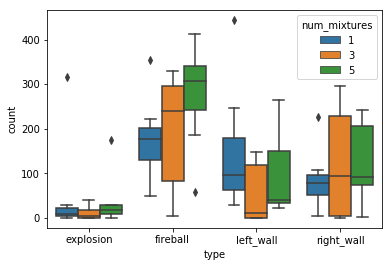

In [9]:
import pandas as pd
import seaborn as sns
#print(events_dicts)
events_frame= pd.DataFrame(events_dicts)
sns.boxplot(x="type", y="count", hue="num_mixtures", data=events_frame)



## Analyzing difference between predicted and actual events

In [11]:
import analyze_rnn_predictions, test_creativity_stability
from test_creativity_stability import count_different_events_in_images
num_independent_tests = 10#100
warm_up_length = 100
num_dream_timesteps=100
events_dicts=[]
for j in range(num_independent_tests):
    print("Step ", j)
    #Getting a random conditioning sequence to start the RNN.
    
    latent_sequence, action_sequence = analyze_rnn_predictions.get_random_starting_sequence(observation_data, action_data,warm_up_length+num_dream_timesteps+1)
    
    for num_mixtures in rnn_analyzers.keys():
        
        #For each trained model
        for rnn_analyzer in rnn_analyzers[num_mixtures]:
            rnn_analyzer._reset()
            rnn_analyzer.warm_up_lstm(action_sequence[:warm_up_length], latent_sequence[:warm_up_length])
            dreamed_latents = []
            actual_latents = []
            dreamed_latent, mixture_weights = rnn_analyzer.predict_one_step(action_sequence[warm_up_length], previous_z=latent_sequence[warm_up_length], sigma_temp=SIGMA_TEMP)
            actual_latents.append(latent_sequence[warm_up_length+1])
            dreamed_latents.append(dreamed_latent)
            for dream_step in range(num_dream_timesteps-1):
                dreamed_latent, mixture_weights = rnn_analyzer.predict_one_step(action_sequence[warm_up_length+dream_step], previous_z=latent_sequence[warm_up_length+dream_step], sigma_temp=SIGMA_TEMP)
                dreamed_latents.append(dreamed_latent)
                actual_latents.append(latent_sequence[warm_up_length+dream_step+1])
            
            actual_images = rnn_analyzer.decode_with_vae(actual_latents)
            dreamed_images = rnn_analyzer.decode_with_vae(dreamed_latents)
            events_dict = count_different_events_in_images(actual_images, dreamed_images)
            events_dict["num_mixtures"] = num_mixtures
            events_dicts.append(events_dict)

Step  0
Step  1
Step  2
Step  3
Step  4
Step  5
Step  6
Step  7
Step  8
Step  9


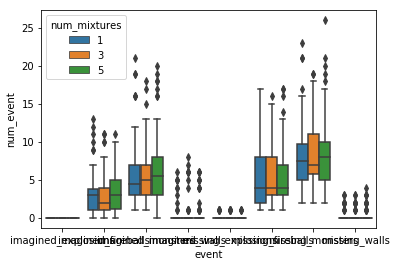

In [12]:
import pandas as pd
import seaborn as sns
#print(events_dicts)
events_frame= pd.DataFrame(events_dicts)
melted = pd.melt(events_frame, id_vars=["num_mixtures"], 
                 var_name="event", value_name="num_event")
#print(melted)
sns.boxplot(x="event", y="num_event", hue="num_mixtures", data=melted)#, hue="num_mixtures", data=events_frame)

In [ ]:
imagined_frame = events_frame.filter(regex='imagined')
missed_frame = events_frame.filter(regex='missing')
imagined_frame['num_mixtures'] = events_frame['num_mixtures']
missed_frame['num_mixtures'] = events_frame['num_mixtures']
melted_imagined = pd.melt(imagined_frame, id_vars=["num_mixtures"], 
                 var_name="event", value_name="num_event")
melted_missing = pd.melt(missed_frame, id_vars=["num_mixtures"], 
                 var_name="event", value_name="num_event")

In [ ]:
sns.boxplot(x="event", y="num_event", hue="num_mixtures", data=melted_imagined)

In [ ]:
sns.boxplot(x="event", y="num_event", hue="num_mixtures", data=melted_missing)